In [1]:
import os
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

## Human

In [4]:
patient_results = '/home/melissa/RESULTS/FINAL_MODEL/Human/Connectivity_MNE/plotting_dataframes/'

In [5]:
all_patient_ls = []
for file in os.listdir(patient_results):
    if file.startswith('.ipy'):
        continue
    patient = pd.read_csv(patient_results + file)
    all_patient_ls.append(patient)
    

In [6]:
all_patient_concat = pd.concat(all_patient_ls)

## Separate by analysis method

In [7]:
coh = all_patient_concat.loc[all_patient_concat['Metric'] == 'coh']
pli = all_patient_concat.loc[all_patient_concat['Metric'] == 'pli']
plv = all_patient_concat.loc[all_patient_concat['Metric'] == 'plv']
wpli = all_patient_concat.loc[all_patient_concat['Metric'] == 'wpli']

## averages for jitter plot

In [8]:
mean_df = plv.groupby(["Patient_ID", "Frequency", "Genotype"])["Value"].mean().reset_index()
# Define the desired order of frequencies
desired_order = ['delta', 'theta', 'sigma', 'beta']

# Create a Categorical data type with the desired order
category_order = pd.Categorical(mean_df['Frequency'], categories=desired_order, ordered=True)

# Assign the Categorical data type to the 'Frequency' column
mean_df['Frequency'] = category_order

# Sort the DataFrame based on the 'Frequency' column
sorted_df = mean_df.sort_values(['Patient_ID', 'Frequency'])


### Genotype

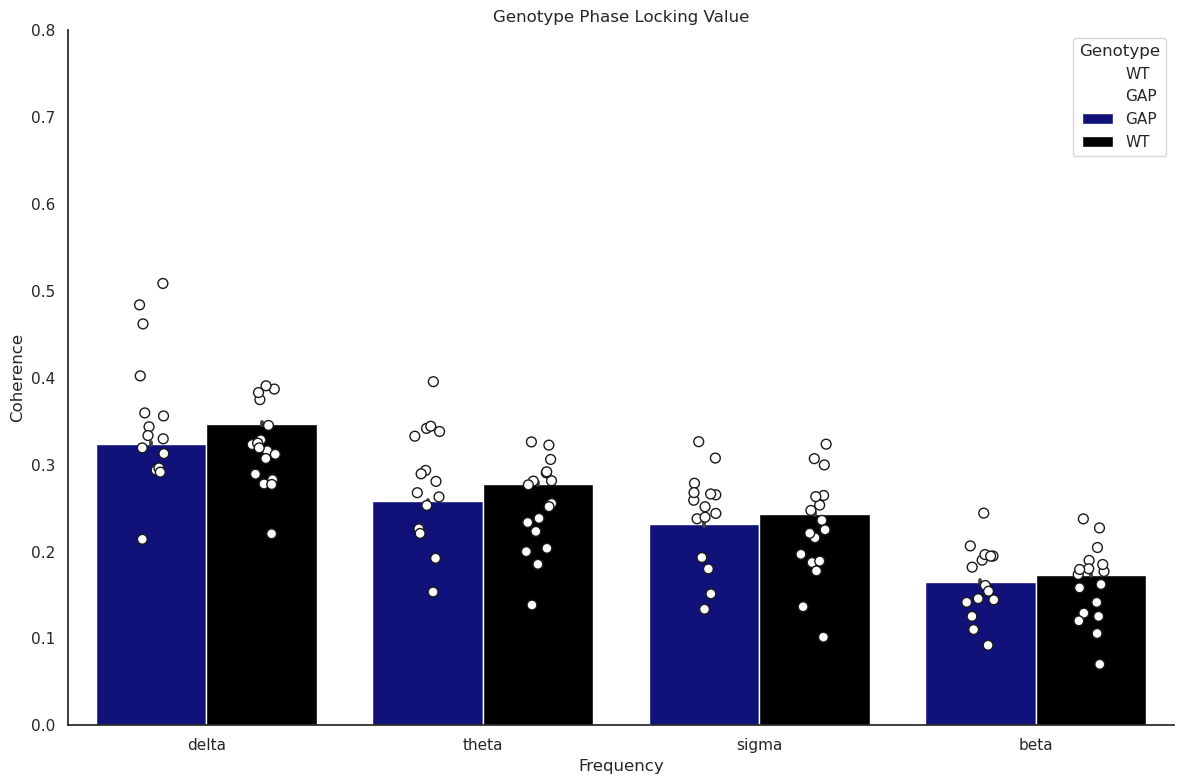

In [10]:
# Set the style
sns.set(style="white")
custom_palette = {"GAP": "darkblue", "WT": "black"}
custom_palette_strip = {"GAP": 'white', "WT": "white"}  # Tuple (fill color, outline color)

# Create the barplot
plt.figure(figsize=(12, 8))
barplot = sns.barplot(x="Frequency", y="Value", hue="Genotype", data=plv, palette=custom_palette)
sns.despine()

# Add labels and title
plt.xlabel("Frequency")
plt.ylabel("Coherence")
plt.title("Genotype Phase Locking Value")
plt.ylim(0, 0.8)

# Create the stripplot, setting the color of the points to white
# Create the stripplot with white points and black outline
stripplot = sns.stripplot(x="Frequency",y="Value",hue="Genotype",data=sorted_df,jitter=True,dodge=True,
                         size=5, palette = custom_palette_strip,
                         edgecolor = 'k', sizes = (50, 50), linewidth = 1)

# Ensure stripplot is placed over the bars by adjusting the z-order
stripplot.set_zorder(10)  # Place stripplot in front of the barplot

# Show the plot
#plt.xticks(rotation=45)  
plt.tight_layout()  

os.chdir('/home/melissa/RESULTS/FINAL_MODEL/Human/Connectivity_MNE/plots/')
plt.savefig("genotype_plv.png", dpi=300, bbox_inches="tight")
plt.savefig("genotype_plv.svg", dpi=300, bbox_inches="tight")

#plt.show()

### Differences in coherence between channels

In [11]:
delta_plv = plv.loc[plv['Frequency'] == 'delta']
theta_plv = plv.loc[plv['Frequency'] == 'theta']
sigma_plv = plv.loc[plv['Frequency'] == 'sigma']
beta_plv = plv.loc[plv['Frequency'] == 'beta']

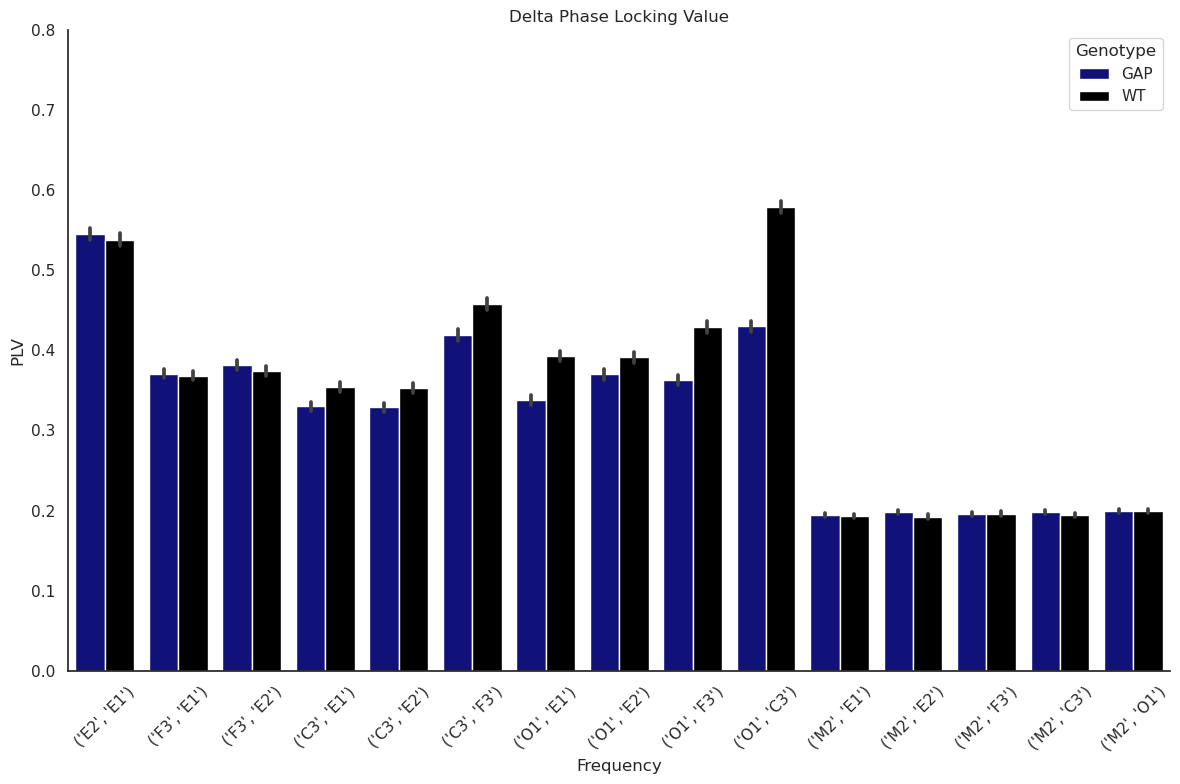

In [16]:
# Set the style

sns.set(style="white")

genotype_palette = {"GAP": "darkblue", "WT": "black"}

# Create the barplot
plt.figure(figsize=(12, 8))  
sns.barplot(x="Channel", y="Value", hue="Genotype", data=delta_plv, palette = genotype_palette)
#sns.stripplot(x="Frequency", y="Value", hue="Genotype", data=df, jitter=True, dodge=True, alpha=0.7, size=5)
sns.despine()

# Add labels and title
plt.xlabel("Frequency")
plt.ylabel("PLV")
plt.title("Delta Phase Locking Value")
plt.ylim(0, 0.8)

plt.xticks(rotation=45)  
plt.tight_layout()  # Ensure labels are not cut off

os.chdir('/home/melissa/RESULTS/FINAL_MODEL/Human/Connectivity_MNE/plots/')
plt.savefig("delta_plv.png", dpi=300, bbox_inches="tight")
plt.savefig("delta_plv.svg", dpi=300, bbox_inches="tight")
plt.show()